# <span style='color:#0D2BA5'>Projet 4 - Anticipez les besoins en consommation de bâtiments : Prédiction Emission </span>
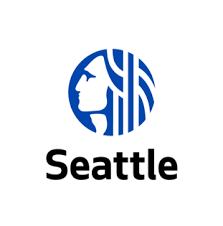

## <span style='background:#33B5FF'>Table des Matieres</span>

In [102]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

### <span style='background:#33B5FF'>1. Introduction</span>



**Mission**
*****
Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.




**Source**
*****
Le jeux de donnée est disponible à l'adresse : [Seatlle Data](https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/Data_Scientist_P4/2016_Building_Energy_Benchmarking.csv)
*****



**Axes d'orientations**
*****

Nous allons :
- Tester différents modèles de prédiction pour le **Consommation**.
- Mettre en place une évaluation rigoureuse des performances, et optimiser les hyperparamètres et le choix d’algorithmes de ML à l’aide d’une validation croisée. 
- Tester au minimum 4 algorithmes de famille différente (par exemple : ElasticNet, SVM, GradientBoosting, XGBoost, RandomForest).
- Evaluer, pour ces prédictions, la pertinence d'un indicateur d'efficacité énergétique appelé **Energy Star Score**.
- **Conclusions**


## <span style='background:#33B5FF'>2. Bibliothèques d'analyse Python</span>

In [103]:
#Cet environnement Python 3 est livré avec de nombreuses bibliothèques d'analyse utiles installées
#Par exemple, voici plusieurs packages utiles à charger

import numpy as np # algèbre linéaire
import pandas as pd # traitement des données, E/S de fichier CSV (par exemple pd.read_csv)
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
# Chargement des librairies
import datetime
import jyquickhelper
import numpy as np
import pandas as pd
import sys
from math import sqrt
import pickle
from pprint import pprint
import time

    
import matplotlib.pyplot as plt #Visualisations graphiques des données
import seaborn as sns
import matplotlib.gridspec as gridspec
%matplotlib inline
#!pip3 install plotly #installer plotly
import plotly.express as px 

# Modélisation
from sklearn import tree
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances


from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import sklearn
from sklearn.preprocessing import StandardScaler
# importing simpleimputer
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.compose import make_column_transformer # Applique des transformateurs aux colonnes d'un tableau
from sklearn.preprocessing import OneHotEncoder #pour le recodage des variables catégorielles 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PowerTransformer
import matplotlib.patches as mpatches
import collections
import folium
import geopandas as gpd 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from math import pi
from scipy.stats import pearsonr


from sklearn.impute import KNNImputer
from sklearn.datasets import make_regression, make_circles
from scipy.stats import kendalltau, spearmanr

from yellowbrick.classifier import ROCAUC


# Data pré-processing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from category_encoders import LeaveOneOutEncoder, TargetEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler # pour effectuer la normalisations min-max
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn import decomposition, preprocessing
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, \
    ExtraTreesRegressor, GradientBoostingRegressor, BaggingRegressor, \
    StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
#from missingpy import MissForest

import json
import ast

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, \
    explained_variance_score, median_absolute_error


# Versions de quelques librairies 
print('Version de quelques librairies utilisées :')
print('Python        : ' + sys.version)
print('NumPy         : ' + np.version.full_version)
print('Pandas        : ' + pd.__version__)
#print('Matplotlib    : ' + plt.__version__)
print('Seaborn    : ' + sns.__version__)
#print('Plotly    : ' + px.__version__)

import datetime
now  = datetime.datetime.now().isoformat()
print('Lancé le : ' + now)

Version de quelques librairies utilisées :
Python        : 3.11.3 (main, Apr  7 2023, 19:25:52) [Clang 14.0.0 (clang-1400.0.29.202)]
NumPy         : 1.24.3
Pandas        : 2.0.1
Seaborn    : 0.12.2
Lancé le : 2023-09-25T21:33:48.670310


In [104]:
# Options pandas/python
dico_pd_option = {
    'display.max_rows': 400,
    'display.max_column': 200,
    'display.width': 100,
    'display.precision': 5,
    'display.max_colwidth': 200
}
for cle, val in dico_pd_option.items():
    pd.set_option(cle, val)
pd.options.mode.chained_assignment = None  # default='warn'

In [241]:
def Regression(model_reg,X_train,X_test,y_train,y_test,df_resultats,titre,affiche_tableau=True):
    
    """
    Lance un modele de régression et sauvegarde les
    performances
    Parameters
    ----------
    model_reg : modèle de régression initialisé, obligatoire.
    X_train : train set matrice X, obligatoire.
    X_test : test set matrice X, obligatoire.
    y_train : train set vecteur y, obligatoire.
    y_test : test set, vecteur y, obligatoire.
    df_resultats : dataframe sauvegardant les traces, obligatoire
    titre : titre à inscrire dans le tableau de sauvegarde, obligatoire.
    affiche_tableau : booleen affiche le tableau de résultat, facultatif.
    Returns
    -------
    df_resultats : Le dataframe de sauvegarde des performances.
    y_pred : Les prédictions pour le modèle
    """
    
    # Top début d'exécution
    time_start = time.time()

    # Entraînement du modèle
    model_reg.fit(X_train, y_train)
    
    # Prédictions avec le test set
    y_pred = model_reg.predict(X_test)

    # Top fin d'exécution
    time_end = time.time()

    # Calcul des métriques
    # une mesure qui indique la performance du modèle
    r2 = r2_score(y_test,y_pred)
    #MAE est une mesure très simple qui calcule la différence absolue entre les valeurs réelles et prédites.
    mae = mean_absolute_error(y_test, y_pred)
    #Il représente la distance au carré entre les valeurs réelles et les valeurs prédites. Nous effectuons le carré pour éviter l'annulation des termes négatifs et c'est l'avantage de MSE.
    mse = mean_squared_error(y_test, y_pred)
    #racine carrée d'erreur quadratile moyenne.
    rmse = sqrt(mse)
    errors = abs(y_pred - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape

    # durée d'exécution
    time_execution = time_end - time_start
    
    # cross validation
    scoring = ['r2', 'neg_mean_squared_error']
    scores = cross_validate(model_reg, X_train, y_train, cv=6,
                            scoring=scoring, return_train_score=True)


    # Sauvegarde des performances
    df_resultats = df_resultats._append(pd.DataFrame({
         'Modèle': [titre],
         'R2': [r2],
         'MSE': [mse],
         'RMSE': [rmse],
         'MAE': [mae],
         'Erreur moy': [np.mean(errors)],
         'Précision': [accuracy],
         'Durée': [time_execution],
         'Test R2 CV': [scores['test_r2'].mean()],
         'Test R2 +/-': [scores['test_r2'].std()],
         'Test MSE CV': [-(scores['test_neg_mean_squared_error'].mean())],
         'Train R2 CV': [scores['train_r2'].mean()],
         'Train R2 +/-': [scores['train_r2'].std()],
         'Train MSE CV': [-(scores['train_neg_mean_squared_error'].mean())]
     }), ignore_index=True)
    #Affiche tableau
    if affiche_tableau:
        display(df_resultats.style.hide())

    return df_resultats, y_pred

In [242]:
def affiche_erreur(y_test, y_pred,titre):
    """
    affiche_erreur : booleen affiche le graphique des erreurs.
    """
    # retour aux valeurs d'origine
    test = (10 ** y_test) + 1
    predict = (10 ** y_pred) + 1
    # affichage des erreurs
    df_res = pd.DataFrame({'true': test, 'pred': predict})
    df_res = df_res.sort_values('true')

    plt.plot(df_res['pred'].values, label='pred')
    plt.plot(df_res['true'].values, label='true')
    plt.xlabel('Test set')
    plt.ylabel("Consommation energie totale")
    plt.suptitle(t='Erreurs pour : '
                 + str(titre),
                 y=0,
                 fontsize=16,
                 alpha=0.75,
                 weight='bold',
                 ha='center')
    plt.legend()
    plt.show()

## <span style='background:#33B5FF'>3. Chargement du jeux de données </span>

In [427]:
# Chargement du jeu de données prédédemment nettoyé
data = pd.read_csv('dfBat_nettoye.csv')

In [428]:
#Afficher les 5 premieres lignes
data.head()

,Unnamed: 0,SiteEnergyUseWN(kBtu),SiteEnergyUseWNLog,TotalGHGEmissions,TotalGHGEmissionsLog,ENERGYSTARScore,BuildingType,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),PrimaryPropertyType,LargestPropertyUseType,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Latitude,Longitude,Nb_utilisation,BuildingAge,TauxFirstUseGFA,TauxSecondtUseGFA,TauxParkingGFA
0,0,7456910.0,6.87256,249.98,2.39964,60.0,NonResidential,7,DOWNTOWN,1.0,12,88434,Hotel,Hotel,2.00388e+06,3946027.0,1276453.0,47.61220,-122.33799,1,89,1.00000,0.00000,0.00000
1,1,8664479.0,6.93774,295.86,2.47255,61.0,NonResidential,7,DOWNTOWN,1.0,11,88502,Hotel,Hotel,0.00000e+00,3242851.0,5145082.0,47.61317,-122.33393,3,20,0.80992,0.14545,0.14545
2,2,73937112.0,7.86886,2089.28,3.32020,43.0,NonResidential,7,DOWNTOWN,1.0,41,759392,Hotel,Hotel,2.15666e+07,49526664.0,1493800.0,47.61393,-122.33810,1,47,0.79122,0.00000,0.20575
3,3,6946800.5,6.84178,286.43,2.45853,56.0,NonResidential,7,DOWNTOWN,1.0,10,61320,Hotel,Hotel,2.21445e+06,2768924.0,1811213.0,47.61412,-122.33664,1,90,1.00000,0.00000,0.00000
4,4,14656503.0,7.16603,505.01,2.70416,75.0,NonResidential,7,DOWNTOWN,1.0,18,113580,Hotel,Hotel,0.00000e+00,5368607.0,8803998.0,47.61375,-122.34047,3,36,0.70307,0.38734,0.35312


In [429]:
# Copie du jeu de données dans un dataframe témoin
data_copy = data.copy()
data_copy.drop(columns = ['Unnamed: 0'],inplace = True)

In [430]:
data_copy.dtypes

SiteEnergyUseWN(kBtu)     float64
SiteEnergyUseWNLog        float64
TotalGHGEmissions         float64
TotalGHGEmissionsLog      float64
ENERGYSTARScore           float64
BuildingType               object
CouncilDistrictCode         int64
Neighborhood               object
NumberofBuildings         float64
NumberofFloors              int64
PropertyGFABuilding(s)      int64
PrimaryPropertyType        object
LargestPropertyUseType     object
SteamUse(kBtu)            float64
Electricity(kBtu)         float64
NaturalGas(kBtu)          float64
Latitude                  float64
Longitude                 float64
Nb_utilisation              int64
BuildingAge                 int64
TauxFirstUseGFA           float64
TauxSecondtUseGFA         float64
TauxParkingGFA            float64
dtype: object

In [431]:
# NumberofBuildings passer de float64 à int64
data_copy['NumberofBuildings'] = data_copy['NumberofBuildings'].astype('int64')

In [432]:
#Descriptions des données 
data_copy.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SiteEnergyUseWN(kBtu),1665.0,NaN,NaN,NaN,8064790.43756,22038776.26328,0.0,1294615.25,2685146.5,7109712.5,471613856.0
SiteEnergyUseWNLog,1665.0,NaN,NaN,NaN,6.39946,0.9691,0.0,6.11214,6.42897,6.85185,8.67359
TotalGHGEmissions,1665.0,NaN,NaN,NaN,185.01883,752.19962,-0.8,19.93,49.58,142.39,16870.98
TotalGHGEmissionsLog,1665.0,NaN,NaN,NaN,1.72999,0.63964,-0.69897,1.32077,1.70398,2.15652,4.22717
ENERGYSTARScore,1093.0,NaN,NaN,NaN,65.42452,28.49377,1.0,48.0,73.0,89.0,100.0
BuildingType,1665,5,NonResidential,1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CouncilDistrictCode,1665.0,NaN,NaN,NaN,4.35375,2.19109,1.0,2.0,4.0,7.0,7.0
Neighborhood,1665,19,DOWNTOWN,359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberofBuildings,1665.0,NaN,NaN,NaN,1.2,2.92498,1.0,1.0,1.0,1.0,111.0
NumberofFloors,1665.0,NaN,NaN,NaN,4.06246,6.1431,0.0,1.0,2.0,4.0,76.0


## <span style='background:#33B5FF'>4. Préparation des données Sans Energy Star Score </span>
Préparation des données pour les rendre applicables aux modèles de machine learning :

In [433]:
# Suppression de la variable 'ENERGYSTARScore'
cols_energystar = 'ENERGYSTARScore'
# Suppression de cette variable du dataframe à modéliser
data_copy.drop([cols_energystar], axis=1, inplace=True)

### <span style='color'>4.1 Préparation de la Matrice X et du Vecteur y</span>
sépartion des données en entrées (matrice X) et de la variable cible (vecteur y).

In [434]:
# Variables qualitatives
cols_cat = data_copy.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat

['BuildingType',
 'Neighborhood',
 'PrimaryPropertyType',
 'LargestPropertyUseType']

In [435]:
# Variables cibles
cols_target = data_copy.columns[0:4].to_list()
cols_target

['SiteEnergyUseWN(kBtu)',
 'SiteEnergyUseWNLog',
 'TotalGHGEmissions',
 'TotalGHGEmissionsLog']

In [453]:
# Variables quantitatives
cols_num = data_copy.select_dtypes(include=[np.number]).columns.to_list()
# Suppression des variables cibles
del cols_num[0:4]
cols_num

['CouncilDistrictCode',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFABuilding(s)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'Latitude',
 'Longitude',
 'Nb_utilisation',
 'BuildingAge',
 'TauxFirstUseGFA',
 'TauxSecondtUseGFA',
 'TauxParkingGFA']

**Matrice X**

In [454]:
# Matrice X
X = data_copy[cols_cat+cols_num]
X.shape

(1665, 18)

**Vecteur y**

**Remarque** : nous avons deux cibles celui transformé en logarithme et sans, nous allons séparé les deux 

In [455]:
# Analyse de la target 'TotalGHGEmissions'' non transformée
y = data_copy['TotalGHGEmissions']
y.shape

(1665,)

In [456]:
# Analyse de la target 'STotalGHGEmissions'' transformée
y_log = data_copy['TotalGHGEmissionsLog']
y_log.shape

(1665,)

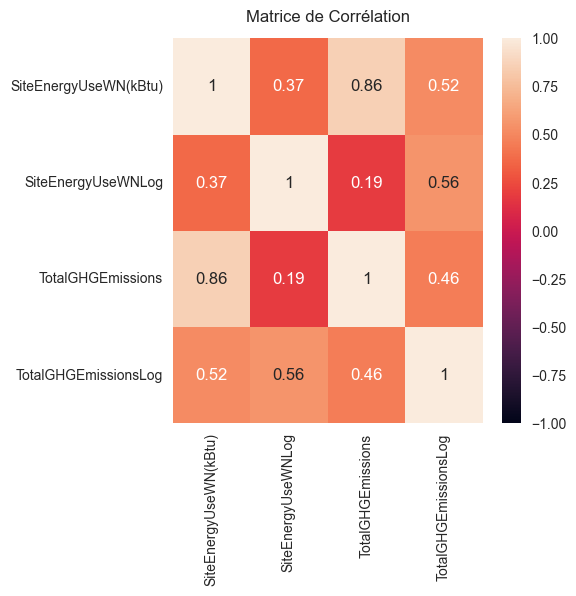

In [457]:
# Matrice de corrélation entre les targets
plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(data_copy[cols_target].corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Matrice de Corrélation', fontdict={'fontsize':12}, pad=12);


### <span style='color'>4.2  Découpage du jeu de données en train set et test set</span>

**Cible SiteEnergyUseWN non transformée**

In [458]:
# Découpage du jeu de données en train set et test set cible non transformée
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state = 1066)
print(f'X_train : {X_train.shape} - X_test : {X_test.shape}')
print(f'y_train : {y_train.shape} - y_test : {y_test.shape}')

X_train : (1332, 18) - X_test : (333, 18)
y_train : (1332,) - y_test : (333,)


**Cible SiteEnergyUseWN  transformée**

In [459]:
# Découpage du jeu de données en train set et test set cible non transformée
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2,random_state = 1066)
print(f'X_train_log : {X_train_log.shape} - X_test_log : {X_test_log.shape}')
print(f'y_train_log : {y_train_log.shape} - y_test_log : {y_test_log.shape}')

X_train_log : (1332, 18) - X_test_log : (333, 18)
y_train_log : (1332,) - y_test_log : (333,)


### <span style='color'>4.3  Encodage des variables qualitatives</span>

**TargetEncoder()**

In [460]:
# Utilisation de TargetEncoder()
target_encoder = TargetEncoder()

# Encodage des données de TotalGHGEmissions non transformée en log10
X_train = target_encoder.fit_transform(X_train, y_train)
X_test = target_encoder.transform(X_test)


In [461]:
# Encodage des données de TotalGHGEmissions transformée en log10
target_encoder = TargetEncoder()
X_train_log= target_encoder.fit_transform(
    X_train_log, y_train_log)
X_test_log = target_encoder.transform(X_test_log)


### <span style='color'>4.4. Standardisation des variables quantitatives</span>

**RobustScaler()**

In [462]:
# RobustScaler
scaler_rob = RobustScaler()

# Jeu de la target de TotalGHGEmissions' non transformée en log10
X_train[cols_num] = scaler_rob.fit_transform(X_train[cols_num].copy(deep=True))
X_test[cols_num] = scaler_rob.transform(X_test[cols_num].copy(deep=True))


In [463]:
# Jeu de la target de TotalGHGEmissions transformée en log10
scaler_rob = RobustScaler()
X_train_log[cols_num] = scaler_rob.fit_transform(
    X_train_log[cols_num].copy(deep=True))
X_test_log[cols_num] = scaler_rob.transform(
    X_test_log[cols_num].copy(deep=True))


## <span style='background:#33B5FF'>5. Tester différents algorithmes de Machine Learning Sans Energy Star Score </span>

In [464]:
# Création d'un dataframe stockant les résultats des différents algorithmes
df_resultats = pd.DataFrame(dtype='object')

### <span style='color'>5.1. Modele Baseline </span>

**DummyRegressor : mean et median**

**Cible TotalGHGEmissions non transformée**

In [465]:
from sklearn.dummy import DummyRegressor
df_resultats, y_pred = Regression(DummyRegressor(strategy='mean'), X_train, X_test, y_train,y_test,df_resultats,'DummyRegressor_mean',False)
df_resultats, y_pred = Regression(DummyRegressor(strategy='median'), X_train, X_test, y_train,y_test,df_resultats,'DummyRegressor_median')

Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
DummyRegressor_mean,-0.028595,78214.266063,279.668136,181.856445,181.856445,-855.456965,0.003099,-0.029715,0.043820,688914.446813,0.000000,0.000000,687246.742343
DummyRegressor_median,-0.129648,85898.285824,293.084093,124.404279,124.404279,-120.934873,0.000574,-0.060088,0.039255,708773.824724,-0.031694,0.003596,708696.822916


**Cible TotalGHGEmissions transformée**

In [466]:
df_resultats, y_pred_d_l = Regression(DummyRegressor(strategy='mean'), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'DummyRegressor_meanlog',False)
df_resultats, y_pred_d_log = Regression(DummyRegressor(strategy='median'), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'DummyRegressor_medianlog')

Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
DummyRegressor_mean,-0.028595,78214.266063,279.668136,181.856445,181.856445,-855.456965,0.003099,-0.029715,0.043820,688914.446813,0.000000,0.000000,687246.742343
DummyRegressor_median,-0.129648,85898.285824,293.084093,124.404279,124.404279,-120.934873,0.000574,-0.060088,0.039255,708773.824724,-0.031694,0.003596,708696.822916
DummyRegressor_meanlog,-0.002247,0.379165,0.615764,0.485176,0.485176,62.320522,0.000805,-0.004079,0.004768,0.416932,0.000000,0.000000,0.416315
DummyRegressor_medianlog,-0.009316,0.381839,0.617931,0.487143,0.487143,62.866267,0.000661,-0.006184,0.009461,0.417956,-0.002366,0.000481,0.417301


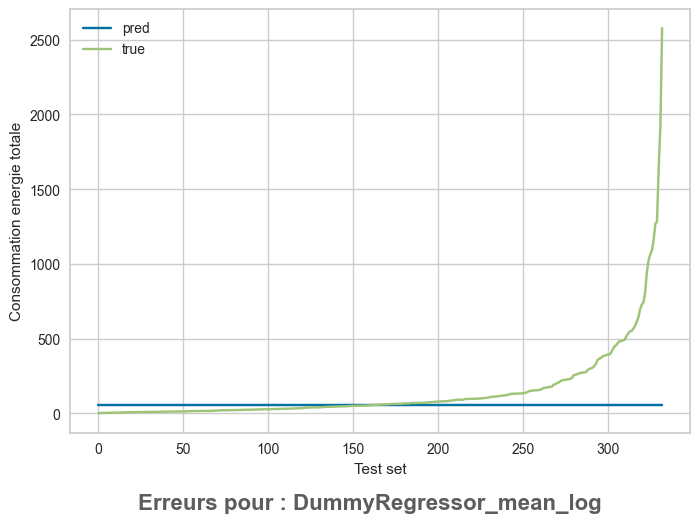

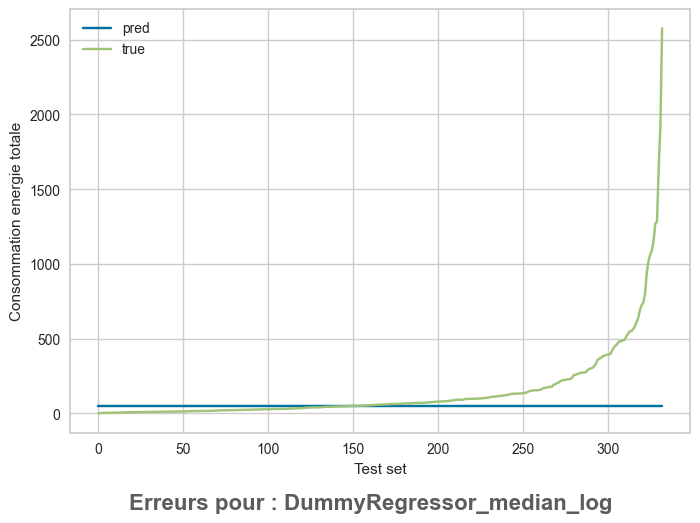

In [467]:
affiche_erreur(y_test_log,y_pred_d_l,'DummyRegressor_mean_log')
affiche_erreur(y_test_log,y_pred_d_log,'DummyRegressor_median_log')

### <span style='color'>5.2. Modeles Lineaires </span>

**Cible TotalGHGEmissions non transformée**

In [468]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
df_resultats, y_pred = Regression(Lasso(), X_train, X_test, y_train,y_test,df_resultats,'Lasso',False)
df_resultats, y_pred = Regression(LinearRegression(), X_train, X_test, y_train, y_test, df_resultats,'LinearRegression',False)
df_resultats, y_pred = Regression(ElasticNet(), X_train, X_test, y_train,y_test,df_resultats,'ElasticNet')

Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
DummyRegressor_mean,-0.028595,78214.266063,279.668136,181.856445,181.856445,-855.456965,0.003099,-0.029715,0.043820,688914.446813,0.000000,0.000000,687246.742343
DummyRegressor_median,-0.129648,85898.285824,293.084093,124.404279,124.404279,-120.934873,0.000574,-0.060088,0.039255,708773.824724,-0.031694,0.003596,708696.822916
DummyRegressor_meanlog,-0.002247,0.379165,0.615764,0.485176,0.485176,62.320522,0.000805,-0.004079,0.004768,0.416932,0.000000,0.000000,0.416315
DummyRegressor_medianlog,-0.009316,0.381839,0.617931,0.487143,0.487143,62.866267,0.000661,-0.006184,0.009461,0.417956,-0.002366,0.000481,0.417301
Lasso,0.999999,0.059049,0.243001,0.088271,0.088271,99.668312,0.016970,1.000000,0.000001,0.680434,1.000000,0.000000,0.090041
LinearRegression,1.000000,0.000009,0.003029,0.002649,0.002649,99.987991,0.008282,1.000000,0.000000,0.000009,1.000000,0.000000,0.000008
ElasticNet,0.998683,100.167997,10.008396,2.719140,2.719140,91.633302,0.009719,0.999613,0.000501,505.534620,0.999872,0.000114,74.619276


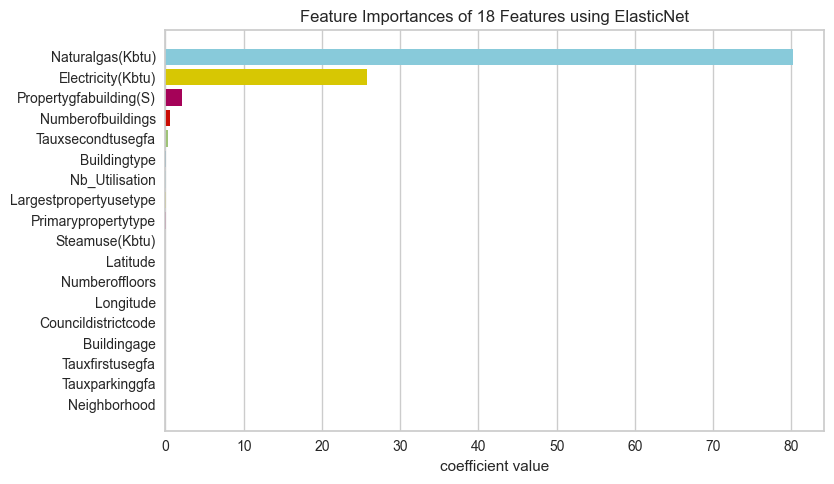

<Axes: title={'center': 'Feature Importances of 18 Features using ElasticNet'}, xlabel='coefficient value'>

In [469]:
ela_reg =ElasticNet()
ela_reg.fit(X_train,y_train)
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ela_reg, labels=labels, relative=False)
visualizer = RadViz(size=(850, 500))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

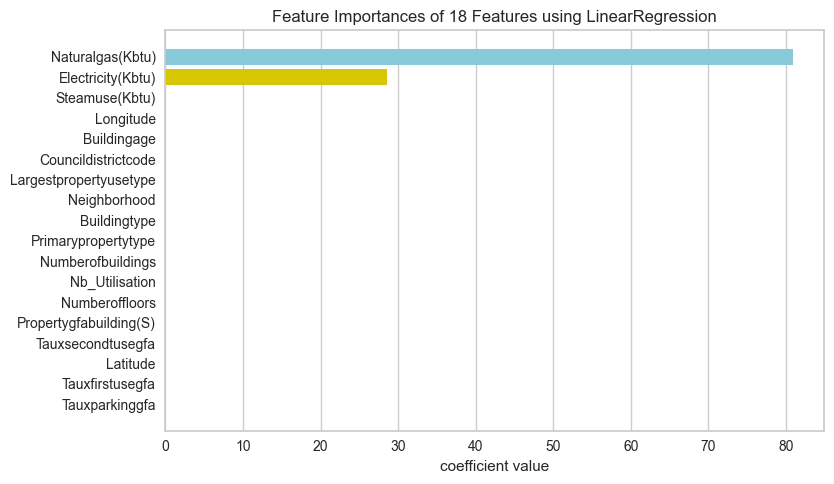

<Axes: title={'center': 'Feature Importances of 18 Features using LinearRegression'}, xlabel='coefficient value'>

In [470]:
lin_reg =LinearRegression()
lin_reg.fit(X_train,y_train)
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lin_reg, labels=labels, relative=False)
visualizer = RadViz(size=(850, 500))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

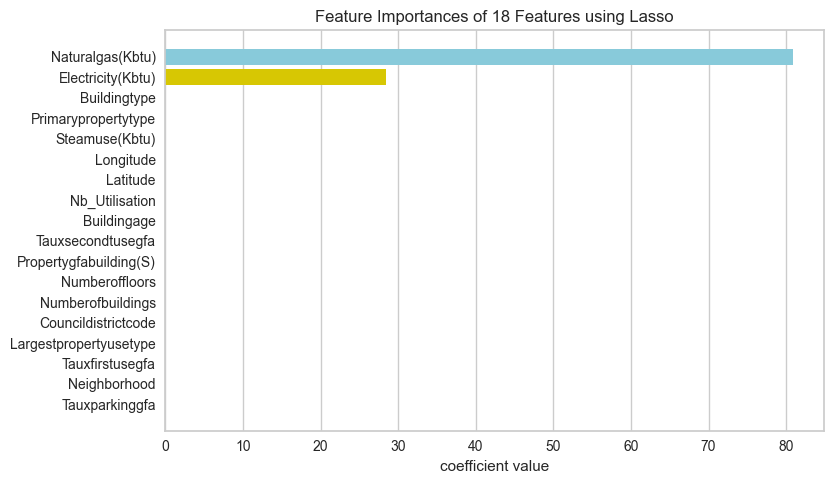

<Axes: title={'center': 'Feature Importances of 18 Features using Lasso'}, xlabel='coefficient value'>

In [471]:
lasso_reg =Lasso()
lasso_reg.fit(X_train,y_train)
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_reg, labels=labels, relative=False)
visualizer = RadViz(size=(850, 500))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

**Cible TotalGHGEmissions  transformée**

In [332]:
df_resultats, y_pred_l_log = Regression(Lasso(), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'Lasso_log',False)
df_resultats, y_pred = Regression(LinearRegression(), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'LinearRegressionLog',False)
df_resultats, y_pred = Regression(ElasticNet(), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'ElasticNetLog')

Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
DummyRegressor_mean,-0.028595,78214.266063,279.668136,181.856445,181.856445,-855.456965,0.000732,-0.029715,0.043820,688914.446813,0.000000,0.000000,687246.742343
DummyRegressor_median,-0.129648,85898.285824,293.084093,124.404279,124.404279,-120.934873,0.000624,-0.060088,0.039255,708773.824724,-0.031694,0.003596,708696.822916
DummyRegressor_meanlog,-0.002247,0.379165,0.615764,0.485176,0.485176,62.320522,0.006345,-0.004079,0.004768,0.416932,0.000000,0.000000,0.416315
DummyRegressor_medianlog,-0.009316,0.381839,0.617931,0.487143,0.487143,62.866267,0.000547,-0.006184,0.009461,0.417956,-0.002366,0.000481,0.417301
Lasso,0.807785,14615.970357,120.896527,78.212686,78.212686,-308.496143,0.043290,0.999373,0.000826,303.442111,0.999825,0.000047,124.259547
LinearRegression,1.000000,0.000009,0.003031,0.002650,0.002650,99.987976,0.007654,1.000000,0.000000,0.000009,1.000000,0.000000,0.000008
ElasticNet,0.255047,56646.147969,238.004512,153.918411,153.918411,-703.704895,0.032786,0.998700,0.001578,572.106023,0.999259,0.000282,479.907787
Lasso_log,0.094746,0.342471,0.585210,0.466357,0.466357,63.666522,0.014447,0.130417,0.042854,0.360059,0.141265,0.013880,0.357436
LinearRegressionLog,-0.005842,0.380525,0.616867,0.485262,0.485262,62.475571,0.009527,0.996783,0.003033,0.001305,0.996958,0.000612,0.001265
ElasticNetLog,0.149968,0.321580,0.567080,0.454982,0.454982,64.473231,0.006075,0.153862,0.046412,0.350407,0.202191,0.025716,0.332063


**Remarque**: 
- Nous avons un R2 trés élévé pour Lasso, LinearRegression et ElasticNet, il y'a un overfitting a cause du nombre insuffisant des données ou de la distribution anormale des données. 
- Ce pendant pour la cible transformé nous remarquons des résultats plus cohérents.

### <span style='color'>5.3. Modeles Non-Lineaires </span>

**Cible TotalGHGEmissions non transformée**

In [333]:
from sklearn.neighbors import KNeighborsRegressor
df_resultats, y_pred = Regression(KNeighborsRegressor(), X_train, X_test, y_train,y_test,df_resultats,'KNeighborsRegressor',False)
df_resultats, y_pred = Regression(XGBRegressor(random_state=21), X_train, X_test, y_train,y_test,df_resultats,'XGBRegressor',False)
df_resultats, y_pred = Regression(GradientBoostingRegressor(random_state=21, verbose=False), X_train, X_test, y_train,y_test,df_resultats,' GradientBoosting',False)
df_resultats, y_pred = Regression(RandomForestRegressor(random_state=21), X_train, X_test, y_train,y_test,df_resultats,'RandomForest',False)
df_resultats, y_pred = Regression(CatBoostRegressor(random_state=21, verbose=False), X_train, X_test, y_train,y_test,df_resultats,'CatBoostRegressor')

Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
DummyRegressor_mean,-0.028595,78214.266063,279.668136,181.856445,181.856445,-855.456965,0.000732,-0.029715,0.043820,688914.446813,0.000000,0.000000,687246.742343
DummyRegressor_median,-0.129648,85898.285824,293.084093,124.404279,124.404279,-120.934873,0.000624,-0.060088,0.039255,708773.824724,-0.031694,0.003596,708696.822916
DummyRegressor_meanlog,-0.002247,0.379165,0.615764,0.485176,0.485176,62.320522,0.006345,-0.004079,0.004768,0.416932,0.000000,0.000000,0.416315
DummyRegressor_medianlog,-0.009316,0.381839,0.617931,0.487143,0.487143,62.866267,0.000547,-0.006184,0.009461,0.417956,-0.002366,0.000481,0.417301
Lasso,0.807785,14615.970357,120.896527,78.212686,78.212686,-308.496143,0.043290,0.999373,0.000826,303.442111,0.999825,0.000047,124.259547
LinearRegression,1.000000,0.000009,0.003031,0.002650,0.002650,99.987976,0.007654,1.000000,0.000000,0.000009,1.000000,0.000000,0.000008
ElasticNet,0.255047,56646.147969,238.004512,153.918411,153.918411,-703.704895,0.032786,0.998700,0.001578,572.106023,0.999259,0.000282,479.907787
Lasso_log,0.094746,0.342471,0.585210,0.466357,0.466357,63.666522,0.014447,0.130417,0.042854,0.360059,0.141265,0.013880,0.357436
LinearRegressionLog,-0.005842,0.380525,0.616867,0.485262,0.485262,62.475571,0.009527,0.996783,0.003033,0.001305,0.996958,0.000612,0.001265
ElasticNetLog,0.149968,0.321580,0.567080,0.454982,0.454982,64.473231,0.006075,0.153862,0.046412,0.350407,0.202191,0.025716,0.332063


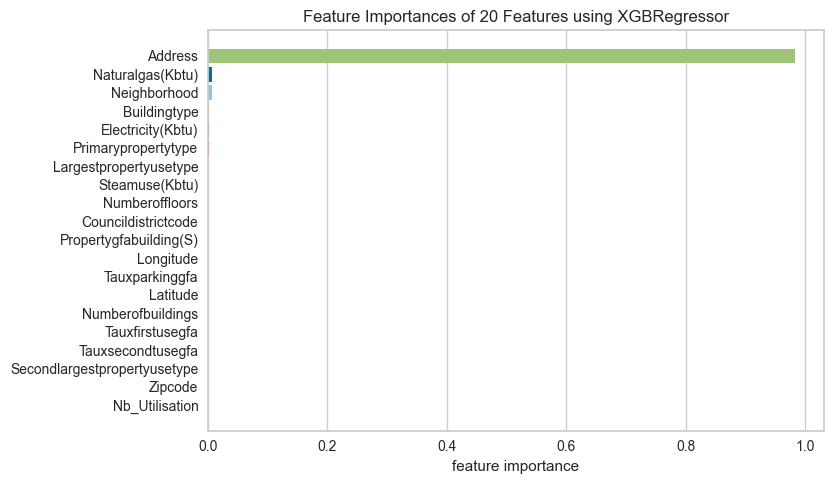

<Axes: title={'center': 'Feature Importances of 20 Features using XGBRegressor'}, xlabel='feature importance'>

In [334]:
xgb_reg =XGBRegressor(random_state=21)
xgb_reg.fit(X_train,y_train)
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(xgb_reg, labels=labels, relative=False)
visualizer = RadViz(size=(850, 500))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

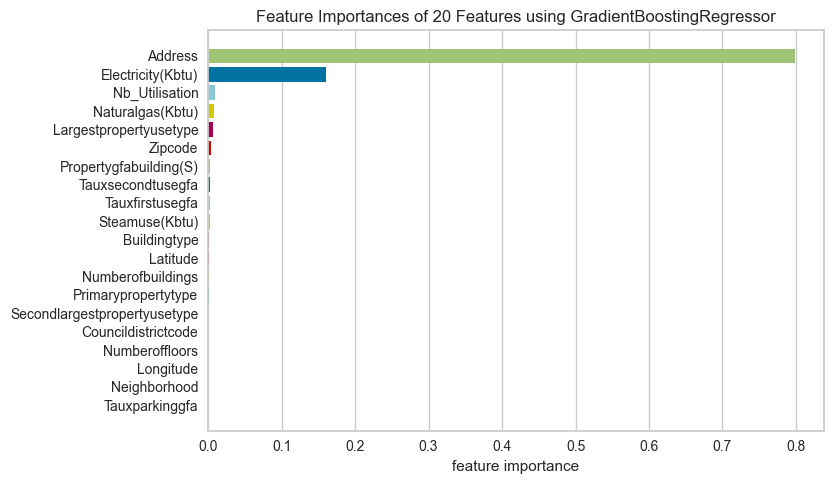

<Axes: title={'center': 'Feature Importances of 20 Features using GradientBoostingRegressor'}, xlabel='feature importance'>

In [335]:
gra_reg =GradientBoostingRegressor(random_state=21, verbose=False)
gra_reg.fit(X_train,y_train)
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(gra_reg, labels=labels, relative=False)
visualizer = RadViz(size=(850, 500))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

**Cible TotalGHGEmissions transformée**

In [336]:
df_resultats, y_pred = Regression(KNeighborsRegressor(), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'KNeighborsRegressorLog',False)
df_resultats, y_pred = Regression(XGBRegressor(random_state=21), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'XGBRegressorLog',False)
df_resultats, y_pred = Regression(GradientBoostingRegressor(random_state=21, verbose=False), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'GradientBoostingLog',False)
df_resultats, y_pred = Regression(RandomForestRegressor(random_state=21), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'RandomForestLog',False)
df_resultats, y_pred = Regression(CatBoostRegressor(random_state=21, verbose=False), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'CatBoostRegressor')


Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
DummyRegressor_mean,-0.028595,78214.266063,279.668136,181.856445,181.856445,-855.456965,0.000732,-0.029715,0.043820,688914.446813,0.000000,0.000000,687246.742343
DummyRegressor_median,-0.129648,85898.285824,293.084093,124.404279,124.404279,-120.934873,0.000624,-0.060088,0.039255,708773.824724,-0.031694,0.003596,708696.822916
DummyRegressor_meanlog,-0.002247,0.379165,0.615764,0.485176,0.485176,62.320522,0.006345,-0.004079,0.004768,0.416932,0.000000,0.000000,0.416315
DummyRegressor_medianlog,-0.009316,0.381839,0.617931,0.487143,0.487143,62.866267,0.000547,-0.006184,0.009461,0.417956,-0.002366,0.000481,0.417301
Lasso,0.807785,14615.970357,120.896527,78.212686,78.212686,-308.496143,0.043290,0.999373,0.000826,303.442111,0.999825,0.000047,124.259547
LinearRegression,1.000000,0.000009,0.003031,0.002650,0.002650,99.987976,0.007654,1.000000,0.000000,0.000009,1.000000,0.000000,0.000008
ElasticNet,0.255047,56646.147969,238.004512,153.918411,153.918411,-703.704895,0.032786,0.998700,0.001578,572.106023,0.999259,0.000282,479.907787
Lasso_log,0.094746,0.342471,0.585210,0.466357,0.466357,63.666522,0.014447,0.130417,0.042854,0.360059,0.141265,0.013880,0.357436
LinearRegressionLog,-0.005842,0.380525,0.616867,0.485262,0.485262,62.475571,0.009527,0.996783,0.003033,0.001305,0.996958,0.000612,0.001265
ElasticNetLog,0.149968,0.321580,0.567080,0.454982,0.454982,64.473231,0.006075,0.153862,0.046412,0.350407,0.202191,0.025716,0.332063


**Remarque** : Les resultats sont meilleurs avec la cible transformée pour les modeles non-lieaires 

**Visualisation des conditions de décision de Random Forest**

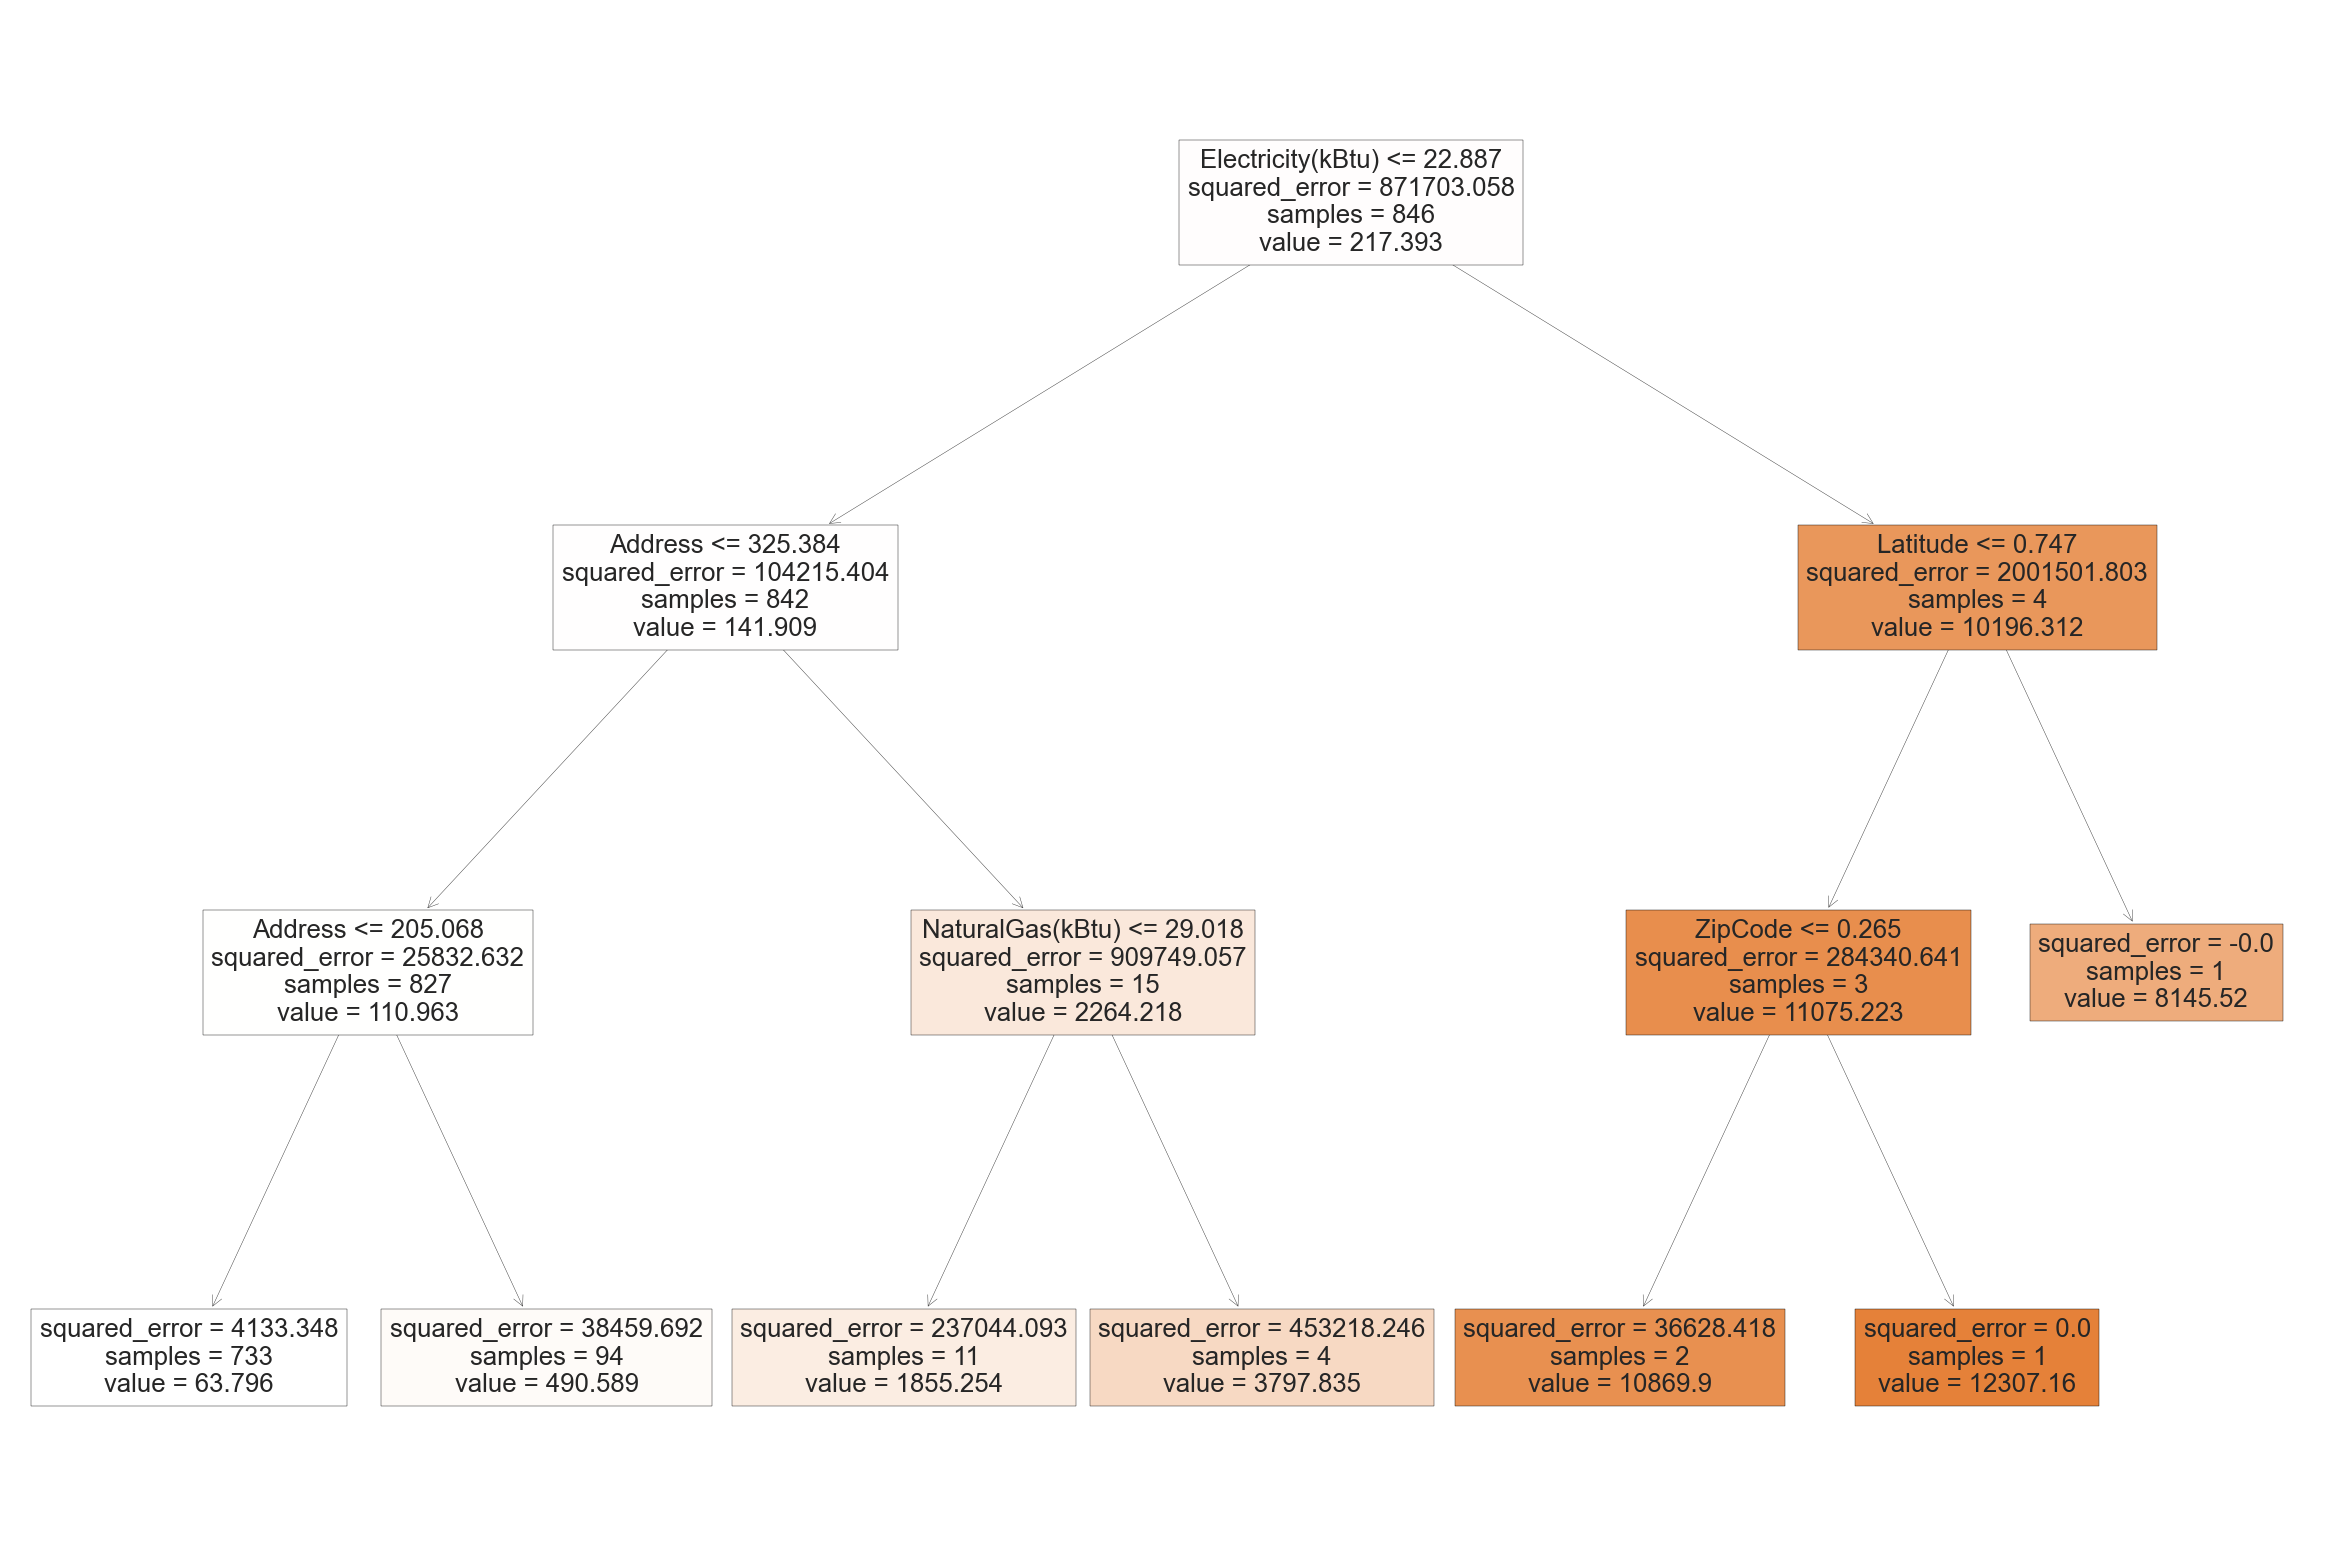

In [337]:
rf_visu = RandomForestRegressor(n_estimators=100, max_depth=3,
                                random_state=21)
# Entraînement du modèle
rf_visu.fit(X_train, y_train)
# Prédictions avec le test set
y_pred = rf_visu.predict(X_test)

# Visualisation avec tree de sklearn
plt.figure(figsize=(30, 20))
vis = tree.plot_tree(rf_visu.estimators_[0], feature_names = X_train.columns.to_list() ,filled=True)
plt.show()

### <span style='color'>5.4. Bilan - Algorithmes les plus performants Sans Energy Star Score </span>

In [338]:
comparatif = df_resultats.sort_values(
    by=['MSE', 'R2', 'Durée','RMSE'])
comparatif.style.hide()

Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
LinearRegression,1.000000,0.000009,0.003031,0.002650,0.002650,99.987976,0.007654,1.000000,0.000000,0.000009,1.000000,0.000000,0.000008
KNeighborsRegressorLog,0.762072,0.090012,0.300019,0.208750,0.208750,83.037387,0.029567,0.755737,0.033124,0.100414,0.844131,0.005537,0.064861
CatBoostRegressor,0.238762,0.287988,0.536645,0.414214,0.414214,67.481144,1.796563,0.993494,0.004484,0.002702,0.999787,0.000043,0.000089
XGBRegressorLog,0.209817,0.298938,0.546752,0.414511,0.414511,65.734211,0.197850,0.994459,0.003965,0.002274,0.999993,0.000001,0.000003
ElasticNetLog,0.149968,0.321580,0.567080,0.454982,0.454982,64.473231,0.006075,0.153862,0.046412,0.350407,0.202191,0.025716,0.332063
GradientBoostingLog,0.112282,0.335837,0.579514,0.450769,0.450769,64.345995,0.588411,0.995638,0.003229,0.001772,0.999503,0.000119,0.000207
Lasso_log,0.094746,0.342471,0.585210,0.466357,0.466357,63.666522,0.014447,0.130417,0.042854,0.360059,0.141265,0.013880,0.357436
DummyRegressor_meanlog,-0.002247,0.379165,0.615764,0.485176,0.485176,62.320522,0.006345,-0.004079,0.004768,0.416932,0.000000,0.000000,0.416315
LinearRegressionLog,-0.005842,0.380525,0.616867,0.485262,0.485262,62.475571,0.009527,0.996783,0.003033,0.001305,0.996958,0.000612,0.001265
DummyRegressor_medianlog,-0.009316,0.381839,0.617931,0.487143,0.487143,62.866267,0.000547,-0.006184,0.009461,0.417956,-0.002366,0.000481,0.417301


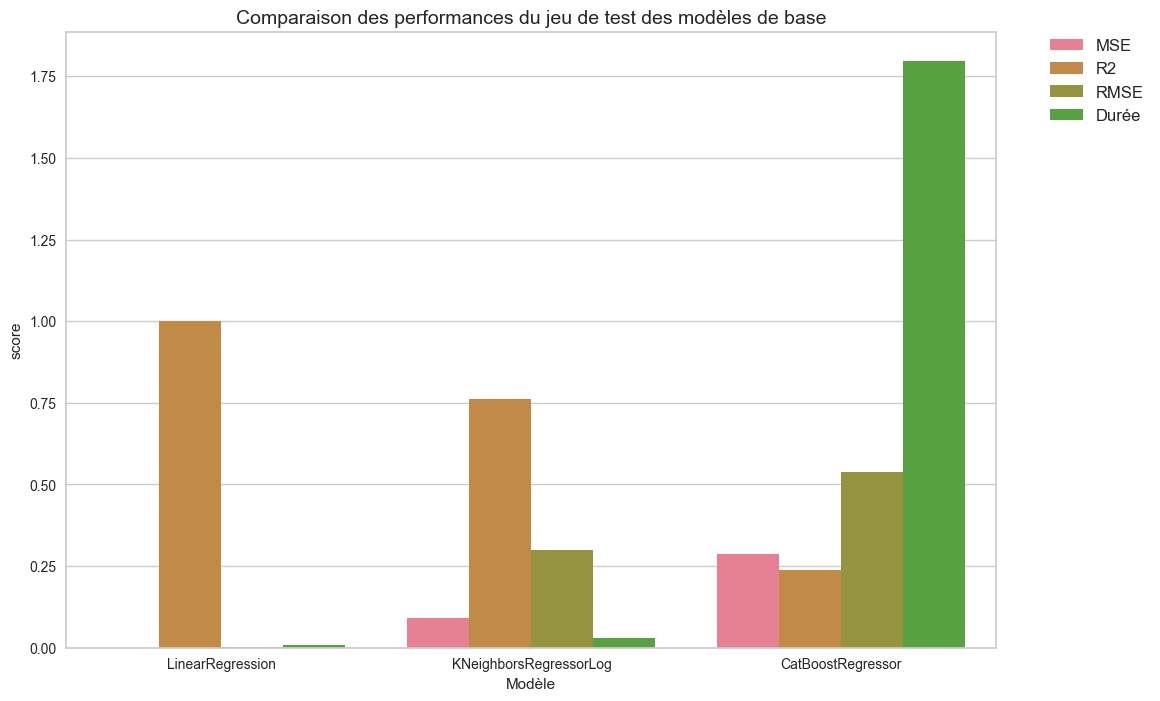

In [339]:
# Comparaison visuelle des 4 algorithmes les plus performants
df_compar = comparatif.head(3)
comparaison_score_melt = pd.melt(df_compar, id_vars=['Modèle'], value_name='score', value_vars=[
                                 'MSE', 'R2', 'RMSE', 'Durée'])
# Visualisation
plt.figure(figsize=(12, 8))
sns.barplot(x=comparaison_score_melt['Modèle'],
            y=comparaison_score_melt['score'], hue=comparaison_score_melt['variable'], palette= sns.color_palette("husl", 9))
plt.title(
    'Comparaison des performances du jeu de test des modèles de base', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.show()

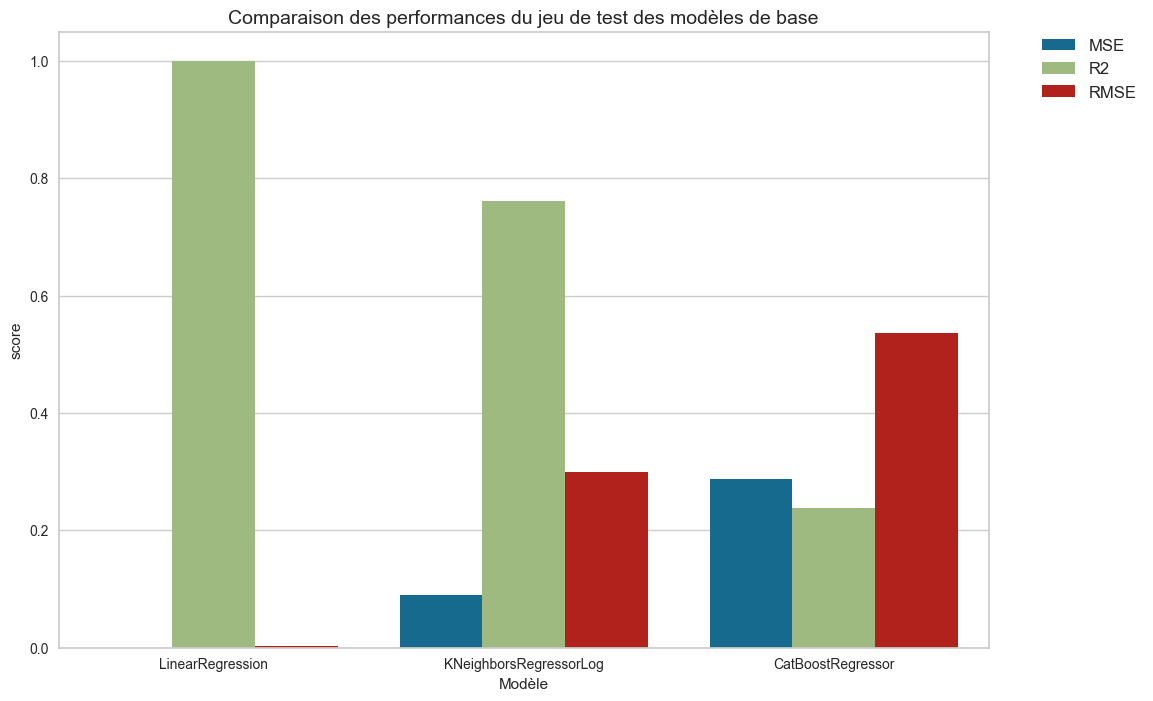

In [340]:
# Comparaison visuelle des 4 algorithmes les plus performants sans la durée
comparaison_score_melt = pd.melt(df_compar, id_vars=[
                                 'Modèle'], value_name='score', value_vars=['MSE', 'R2', 'RMSE'])
# Visualisation
plt.figure(figsize=(12, 8))
sns.barplot(x=comparaison_score_melt['Modèle'], palette=sns.color_palette(),
            y=comparaison_score_melt['score'], hue=comparaison_score_melt['variable'])
plt.title(
    'Comparaison des performances du jeu de test des modèles de base', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.show()

## <span style='background:#33B5FF'>6. Préparation des données Avec Energy Star Score </span>
Préparation des données pour les rendre applicables aux modèles de machine learning :

In [354]:
# Chargement du jeu de données prédédemment nettoyé
data = pd.read_csv('dfBat_nett.csv')
data_copy = data.copy()
data_copy.drop(columns = ['Unnamed: 0'],inplace = True)
# NumberofBuildings passer de float64 à int64
data_copy['NumberofBuildings'] = data_copy['NumberofBuildings'].astype('int64')

**Imputation des valeurs manquantes pour Energy Star Score**

In [355]:
# importing simpleimputer
from sklearn.impute import SimpleImputer
#imputer les valeurs manquantes de EnergyStarScore
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
data_copy['ENERGYSTARScore']= imputer.fit_transform(data_copy['ENERGYSTARScore'].values.reshape(-1,1))[:,0]

In [356]:
# Variables qualitatives
cols_cat = data_copy.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat

['BuildingType',
 'Neighborhood',
 'PrimaryPropertyType',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'Address']

In [357]:
# Variables cibles
cols_target = data_copy.columns[0:4].to_list()
cols_target

['SiteEnergyUseWN(kBtu)',
 'SiteEnergyUseWNLog',
 'TotalGHGEmissions',
 'TotalGHGEmissionsLog']

In [358]:
# Variables quantitatives
cols_num = data_copy.select_dtypes(include=[np.number]).columns.to_list()
# Suppression des variables cibles
del cols_num[0:4]
cols_num

['ENERGYSTARScore',
 'CouncilDistrictCode',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFABuilding(s)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'Latitude',
 'Longitude',
 'ZipCode',
 'Nb_utilisation',
 'TauxParkingGFA',
 'TauxFirstUseGFA',
 'TauxSecondtUseGFA']

In [359]:
# Matrice X et y
X = data_copy[cols_cat+cols_num]
# Analyse de la target 'TotalGHGEmissions' non transformée
y = data_copy['TotalGHGEmissions']

In [360]:
# Analyse de la target 'TotalGHGEmissions' transformée
y_log = data_copy['TotalGHGEmissionsLog']

In [361]:
# Découpage du jeu de données en train set et test set cible non transformée
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20,random_state = 1066)
print(f'X_train : {X_train.shape} - X_test : {X_test.shape}')
print(f'y_train : {y_train.shape} - y_test : {y_test.shape}')

X_train : (1332, 21) - X_test : (333, 21)
y_train : (1332,) - y_test : (333,)


In [362]:
# Découpage du jeu de données en train set et test set cible non transformée
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.20,random_state = 1066)
print(f'X_train_log : {X_train_log.shape} - X_test_log : {X_test_log.shape}')
print(f'y_train_log : {y_train_log.shape} - y_test_log : {y_test_log.shape}')

X_train_log : (1332, 21) - X_test_log : (333, 21)
y_train_log : (1332,) - y_test_log : (333,)


In [363]:
# Utilisation de TargetEncoder()
target_encoder = TargetEncoder()

# Encodage des données de TotalGHGEmissions non transformée en log10
X_train = target_encoder.fit_transform(X_train, y_train)
X_test = target_encoder.transform(X_test)


In [364]:
# Encodage des données de TotalGHGEmissions transformée en log10
target_encoder = TargetEncoder()
X_train_log= target_encoder.fit_transform(
    X_train_log, y_train_log)
X_test_log = target_encoder.transform(X_test_log)


In [365]:
# RobustScaler
scaler_rob = RobustScaler()

# Jeu de la target de TotalGHGEmissions non transformée en log10
X_train[cols_num] = scaler_rob.fit_transform(X_train[cols_num].copy(deep=True))
X_test[cols_num] = scaler_rob.transform(X_test[cols_num].copy(deep=True))


In [366]:
# Jeu de la target de TotalGHGEmissions transformée en log10
scaler_rob = RobustScaler()
X_train_log[cols_num] = scaler_rob.fit_transform(
    X_train_log[cols_num].copy(deep=True))
X_test_log[cols_num] = scaler_rob.transform(
    X_test_log[cols_num].copy(deep=True))


## <span style='background:#33B5FF'>7. Tester différents algorithmes de Machine Learning Avec Energy Star Score </span>

In [367]:
# Création d'un dataframe stockant les résultats des différents algorithmes
df_resultats = pd.DataFrame(dtype='object')

**Cible TotalGHGEmissions  Non transformée**

In [368]:
df_resultats, y_pred = Regression(DummyRegressor(strategy='mean'), X_train, X_test, y_train,y_test,df_resultats,'DummyRegressor_mean',False)
df_resultats, y_pred = Regression(DummyRegressor(strategy='median'), X_train, X_test, y_train,y_test,df_resultats,'DummyRegressor_median',False)
df_resultats, y_pred = Regression(Lasso(), X_train, X_test, y_train,y_test,df_resultats,'Lasso',False)
df_resultats, y_pred_reg = Regression(LinearRegression(), X_train, X_test, y_train, y_test, df_resultats,'LinearRegression',False)
df_resultats, y_pred = Regression(ElasticNet(), X_train, X_test, y_train,y_test,df_resultats,'ElasticNet',False)
df_resultats, y_pred = Regression(KNeighborsRegressor(), X_train, X_test, y_train,y_test,df_resultats,'KNeighborsRegressor',False)
df_resultats, y_pred = Regression(XGBRegressor(random_state=21), X_train, X_test, y_train,y_test,df_resultats,'XGBRegressor',False)
df_resultats, y_pred = Regression(GradientBoostingRegressor(random_state=21, verbose=False), X_train, X_test, y_train,y_test,df_resultats,' GradientBoosting',False)
df_resultats, y_pred = Regression(RandomForestRegressor(random_state=21), X_train, X_test, y_train,y_test,df_resultats,'RandomForest',False)
df_resultats, y_pred = Regression(CatBoostRegressor(random_state=21, verbose=False), X_train, X_test, y_train,y_test,df_resultats,'CatBoostRegressor')

Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
DummyRegressor_mean,-0.028595,78214.266063,279.668136,181.856445,181.856445,-855.456965,0.001395,-0.029715,0.043820,688914.446813,0.000000,0.000000,687246.742343
DummyRegressor_median,-0.129648,85898.285824,293.084093,124.404279,124.404279,-120.934873,0.000547,-0.060088,0.039255,708773.824724,-0.031694,0.003596,708696.822916
Lasso,0.807863,14610.064466,120.872100,78.196893,78.196893,-308.413661,0.026088,0.999373,0.000826,303.437913,0.999825,0.000047,124.263417
LinearRegression,1.000000,0.000009,0.003032,0.002653,0.002653,99.987964,0.004874,1.000000,0.000000,0.000009,1.000000,0.000000,0.000008
ElasticNet,0.255047,56646.145695,238.004508,153.918408,153.918408,-703.704879,0.018161,0.998700,0.001578,572.106752,0.999259,0.000282,479.905361
KNeighborsRegressor,0.368225,48040.107656,219.180537,119.125556,119.125556,-318.505038,0.008243,0.557114,0.232040,311904.029100,0.744773,0.064305,175627.240733
XGBRegressor,0.022960,74294.015391,272.569285,173.330901,173.330901,-782.898005,0.235490,0.966142,0.041020,46324.596334,1.000000,0.000000,0.186138
GradientBoosting,0.126836,66395.311385,257.672877,172.075851,172.075851,-803.866030,0.525871,0.959824,0.048674,54340.229286,0.999955,0.000013,29.076827
RandomForest,-0.188928,90405.924113,300.675779,183.480691,183.480691,-843.033389,1.321657,0.952564,0.066192,72992.821088,0.980061,0.003947,13677.242402
CatBoostRegressor,0.437263,42790.418167,206.858450,120.273543,120.273543,-456.299578,2.023202,0.869555,0.188839,205450.871146,0.999981,0.000005,12.542770


**Cible TotalGHGEmissions  transformée**

In [369]:
df_resultats, y_pred_d_l = Regression(DummyRegressor(strategy='mean'), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'DummyRegressor_meanlog',False)
df_resultats, y_pred_d_log = Regression(DummyRegressor(strategy='median'), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'DummyRegressor_medianlog',False)
df_resultats, y_pred_l_log = Regression(Lasso(), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'Lasso_log',False)
df_resultats, y_pred = Regression(LinearRegression(), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'LinearRegressionLog',False)
df_resultats, y_pred = Regression(ElasticNet(), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'ElasticNetLog',False)
df_resultats, y_pred = Regression(KNeighborsRegressor(), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'KNeighborsRegressorLog',False)
df_resultats, y_pred = Regression(XGBRegressor(random_state=21), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'XGBRegressorLog',False)
df_resultats, y_pred = Regression(GradientBoostingRegressor(random_state=21, verbose=False), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'GradientBoostingLog',False)
df_resultats, y_pred = Regression(RandomForestRegressor(random_state=21), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'RandomForestLog',False)
df_resultats, y_pred = Regression(CatBoostRegressor(random_state=21, verbose=False), X_train_log, X_test_log, y_train_log,y_test_log,df_resultats,'CatBoostRegressor')


Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
DummyRegressor_mean,-0.028595,78214.266063,279.668136,181.856445,181.856445,-855.456965,0.001395,-0.029715,0.043820,688914.446813,0.000000,0.000000,687246.742343
DummyRegressor_median,-0.129648,85898.285824,293.084093,124.404279,124.404279,-120.934873,0.000547,-0.060088,0.039255,708773.824724,-0.031694,0.003596,708696.822916
Lasso,0.807863,14610.064466,120.872100,78.196893,78.196893,-308.413661,0.026088,0.999373,0.000826,303.437913,0.999825,0.000047,124.263417
LinearRegression,1.000000,0.000009,0.003032,0.002653,0.002653,99.987964,0.004874,1.000000,0.000000,0.000009,1.000000,0.000000,0.000008
ElasticNet,0.255047,56646.145695,238.004508,153.918408,153.918408,-703.704879,0.018161,0.998700,0.001578,572.106752,0.999259,0.000282,479.905361
KNeighborsRegressor,0.368225,48040.107656,219.180537,119.125556,119.125556,-318.505038,0.008243,0.557114,0.232040,311904.029100,0.744773,0.064305,175627.240733
XGBRegressor,0.022960,74294.015391,272.569285,173.330901,173.330901,-782.898005,0.235490,0.966142,0.041020,46324.596334,1.000000,0.000000,0.186138
GradientBoosting,0.126836,66395.311385,257.672877,172.075851,172.075851,-803.866030,0.525871,0.959824,0.048674,54340.229286,0.999955,0.000013,29.076827
RandomForest,-0.188928,90405.924113,300.675779,183.480691,183.480691,-843.033389,1.321657,0.952564,0.066192,72992.821088,0.980061,0.003947,13677.242402
CatBoostRegressor,0.437263,42790.418167,206.858450,120.273543,120.273543,-456.299578,2.023202,0.869555,0.188839,205450.871146,0.999981,0.000005,12.542770


**Remarque**: 
Les modeles non-lineaires ont un score R2 trés élevées avec la cible transformée. Ce pendant il n'y a **pas de différence** que l'on prédisse **TotalGHEmissions** **SANS EnergyStarScore ou AVEC EnergyStarScore**

### <span style='color'>7.1. Bilan - Algorithmes les plus performants Avec Energy Star Score </span>

In [370]:
comparatif = df_resultats.sort_values(
    by=['MSE', 'R2', 'Durée','RMSE'])
comparatif.style.hide()

Modèle,R2,MSE,RMSE,MAE,Erreur moy,Précision,Durée,Test R2 CV,Test R2 +/-,Test MSE CV,Train R2 CV,Train R2 +/-,Train MSE CV
LinearRegression,1.000000,0.000009,0.003032,0.002653,0.002653,99.987964,0.004874,1.000000,0.000000,0.000009,1.000000,0.000000,0.000008
KNeighborsRegressorLog,0.747648,0.095468,0.308980,0.231425,0.231425,80.976519,0.007761,0.722896,0.024739,0.114264,0.825063,0.003691,0.072809
CatBoostRegressor,0.299916,0.264852,0.514638,0.389061,0.389061,68.111193,2.182935,0.993643,0.004060,0.002649,0.999812,0.000027,0.000078
XGBRegressorLog,0.231348,0.290793,0.539252,0.409883,0.409883,66.196596,0.238021,0.994181,0.003921,0.002395,0.999994,0.000001,0.000002
ElasticNetLog,0.149968,0.321580,0.567080,0.454982,0.454982,64.473231,0.007669,0.153862,0.046412,0.350407,0.202191,0.025716,0.332063
GradientBoostingLog,0.121132,0.332489,0.576619,0.449046,0.449046,64.447828,0.511827,0.995513,0.003271,0.001821,0.999507,0.000131,0.000205
Lasso_log,0.094746,0.342471,0.585210,0.466357,0.466357,63.666522,0.015866,0.130417,0.042854,0.360059,0.141265,0.013880,0.357436
DummyRegressor_meanlog,-0.002247,0.379165,0.615764,0.485176,0.485176,62.320522,0.000874,-0.004079,0.004768,0.416932,0.000000,0.000000,0.416315
LinearRegressionLog,-0.005971,0.380574,0.616907,0.485292,0.485292,62.473612,0.007251,0.996776,0.003038,0.001307,0.996959,0.000613,0.001264
DummyRegressor_medianlog,-0.009316,0.381839,0.617931,0.487143,0.487143,62.866267,0.000563,-0.006184,0.009461,0.417956,-0.002366,0.000481,0.417301


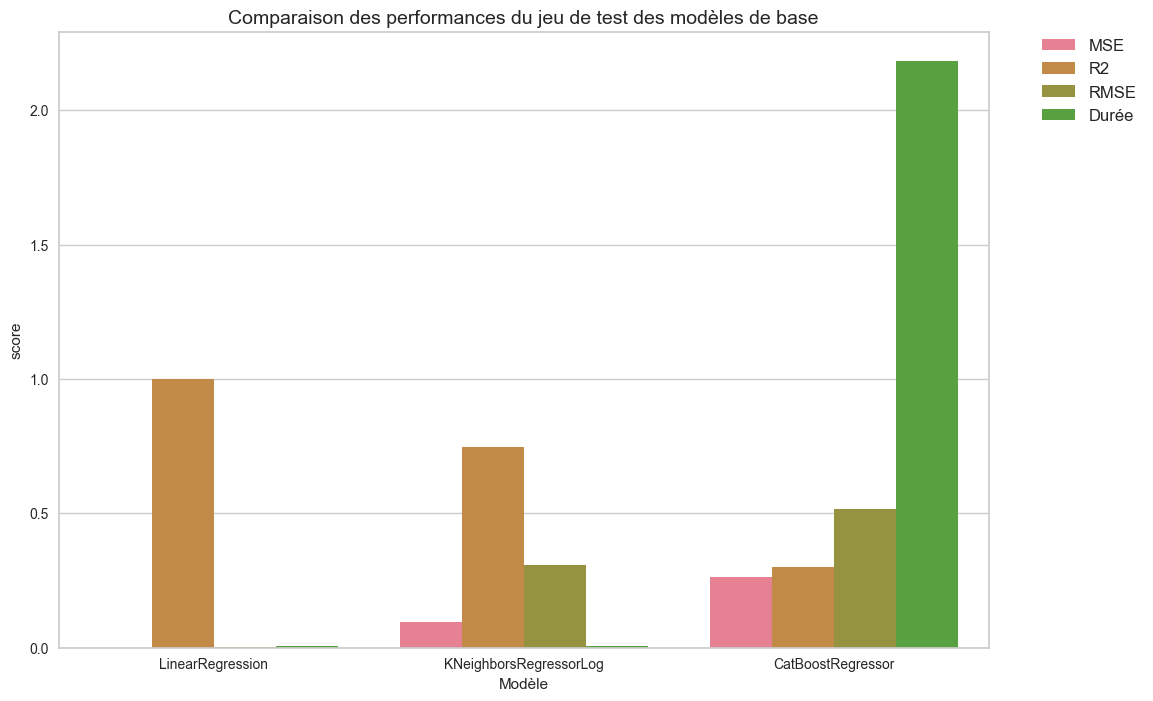

In [371]:
# Comparaison visuelle des 4 algorithmes les plus performants
df_compar = comparatif.head(3)
comparaison_score_melt = pd.melt(df_compar, id_vars=['Modèle'], value_name='score', value_vars=[
                                 'MSE', 'R2', 'RMSE', 'Durée'])
# Visualisation
plt.figure(figsize=(12, 8))
sns.barplot(x=comparaison_score_melt['Modèle'],
            y=comparaison_score_melt['score'], hue=comparaison_score_melt['variable'], palette= sns.color_palette("husl", 9))
plt.title(
    'Comparaison des performances du jeu de test des modèles de base', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.show()

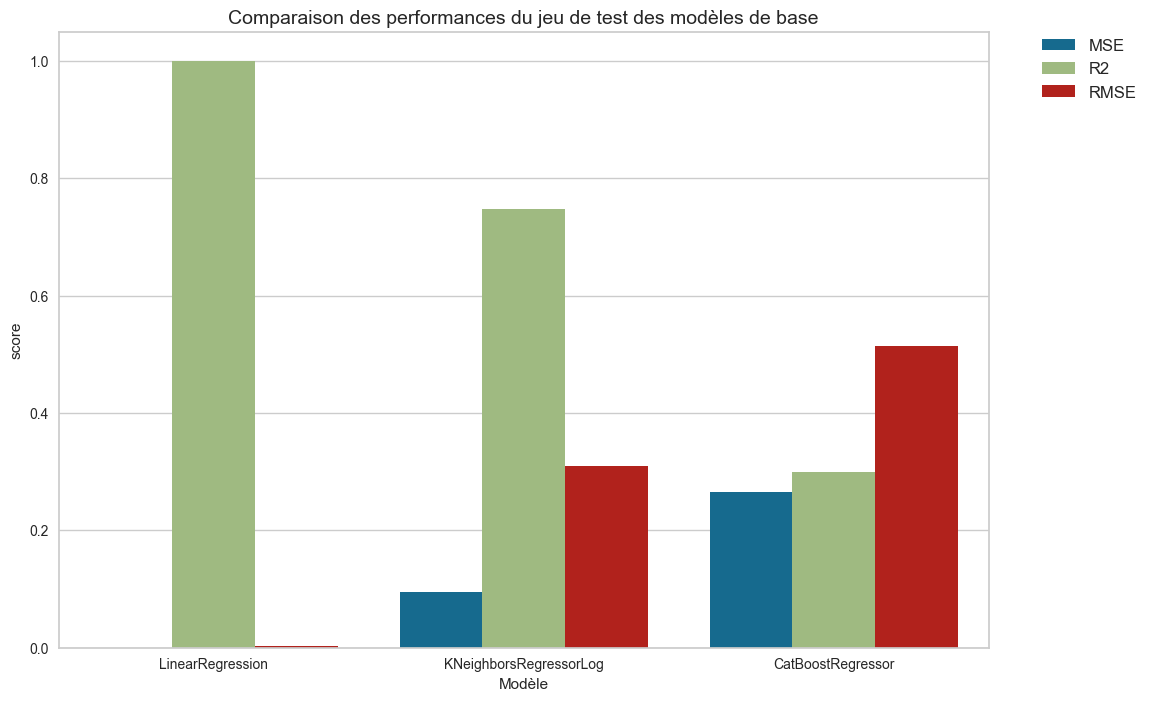

In [372]:
# Comparaison visuelle des 4 algorithmes les plus performants sans la durée
comparaison_score_melt = pd.melt(df_compar, id_vars=[
                                 'Modèle'], value_name='score', value_vars=['MSE', 'R2', 'RMSE'])
# Visualisation
plt.figure(figsize=(12, 8))
sns.barplot(x=comparaison_score_melt['Modèle'], palette=sns.color_palette(),
            y=comparaison_score_melt['score'], hue=comparaison_score_melt['variable'])
plt.title(
    'Comparaison des performances du jeu de test des modèles de base', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.show()

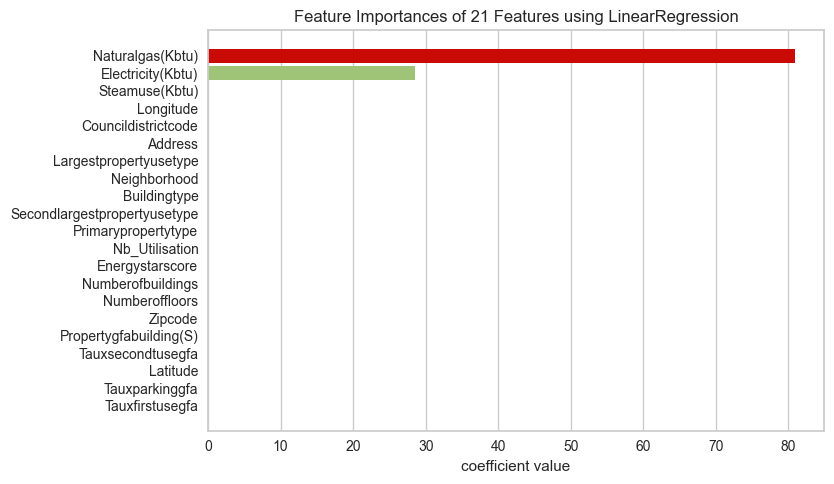

<Axes: title={'center': 'Feature Importances of 21 Features using LinearRegression'}, xlabel='coefficient value'>

In [373]:
lin_reg =LinearRegression()
lin_reg.fit(X_train,y_train)
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lin_reg, labels=labels, relative=False)
visualizer = RadViz(size=(850, 500))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

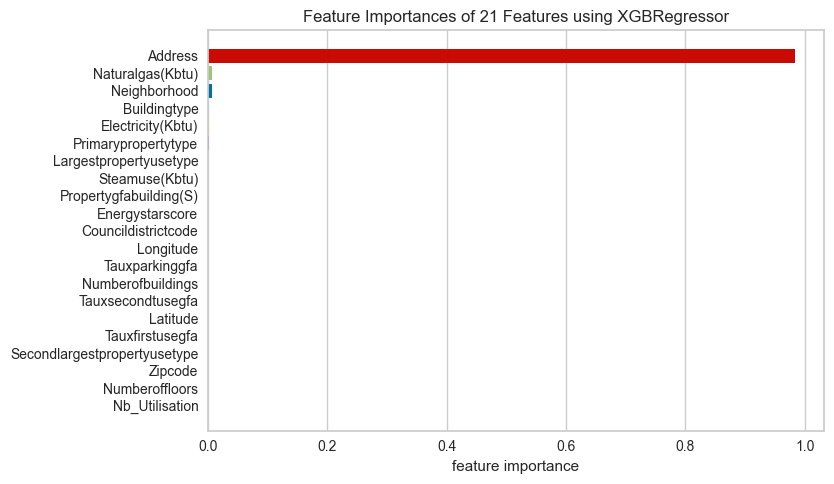

<Axes: title={'center': 'Feature Importances of 21 Features using XGBRegressor'}, xlabel='feature importance'>

In [374]:
xgb_reg =XGBRegressor(random_state=21)
xgb_reg.fit(X_train,y_train)
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(xgb_reg, labels=labels, relative=False)
visualizer = RadViz(size=(850, 500))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()